In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import datetime

import gym
import trading_env

import os
import agent 
from os import __file__

In [2]:
#env = gym.make('trading-v0')
env_trading = gym.make('test_trading-v0')

Loading historical data file


Holder Agent
--------------
To begin a holder agent will run on the month of march 2017, which will provide a reference to compare future agents. The same could also be done with a random agent. A holder agent is equivalent to set the action to 1 at each step (selling 100% of the portfolio's fiat).

In [3]:
date = datetime.datetime(2017, 5, 1, 0, 0)
env_trading.reset(date=date)
rewards = []
portfolio = []
while True:
    action = 1.0 #Holding
    s, r, done, _ = env_trading.step(action)
    rewards.append(r)
    portfolio.append(env_trading.portfolio_value)
    if done:
        break

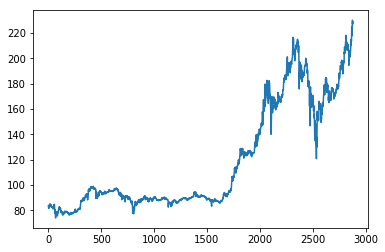

In [4]:
plt.plot(portfolio)
plt.show()

Stochastic Policy Gradient
-----------

In [5]:
agent = agent.StochasticPolicyGradientAgent(env_trading) #Do not run this twice without reseting the Kernel!

In [6]:
#As a sanity check I try to overfit over the same step
#A profitable action in this case would be to buy (action=1)

date = datetime.datetime(2017, 5, 1, 0, 0)
rewards = []
losses = []
env_trading.start_fiat = 100
env_trading.start_crypto = 1

for i in range(100):
    start = env_trading.reset(date=date)
    start = np.reshape(start,200)
    action = agent.act([start])
    s, r, done, _ = env_trading.step(action)
    s = np.reshape(s,200)
    agent.store_step(action, s, r)
    rewards.append(r)
    agent.train()


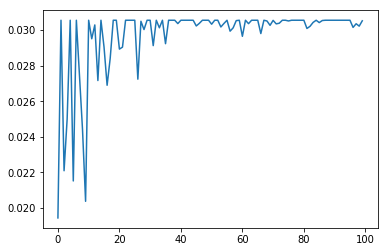

In [7]:
#Mu tends to 1 and sigma tto zero as expected
plt.plot(rewards)
plt.show()